## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_17-27-04-23.csv', firstRow=330, lastRow=336)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_210423_S331-336.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=70s and ended at t=432s; mass=44.6155g
This equals a volume of 44.705m; expected was 44.834mL; error is 0.287%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001171875 g/s^2


<IPython.core.display.Javascript object>


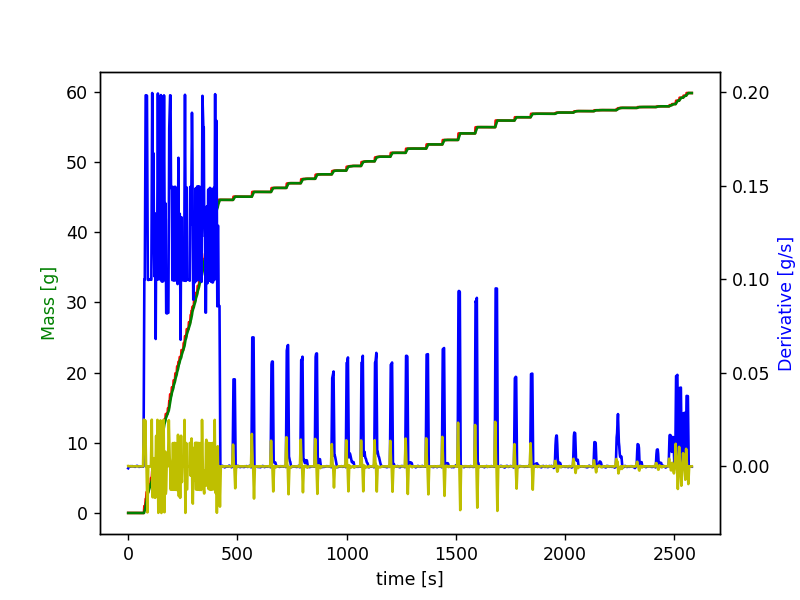

Addition of 0.461g Texapon SB 3 KC detected from 476s to 496s - expected volume = 0.801mL and actual volume = 0.416mL (resulting error is 48.086%)
Addition of 0.687g Texapon SB 3 KC detected from 562s to 582s - expected volume = 0.822mL and actual volume = 0.613mL (resulting error is 25.429%)
Addition of 0.567g Plantapon ACG 50 detected from 650s to 670s - expected volume = 0.568mL and actual volume = 0.503mL (resulting error is 11.337%)
Addition of 0.663g Plantapon ACG 50 detected from 720s to 740s - expected volume = 0.568mL and actual volume = 0.589mL (resulting error is 3.737%)
Addition of 0.596g Plantapon ACG 50 detected from 786s to 806s - expected volume = 0.535mL and actual volume = 0.522mL (resulting error is 2.359%)
Addition of 0.612g Plantapon ACG 50 detected from 852s to 872s - expected volume = 0.535mL and actual volume = 0.536mL (resulting error is 0.246%)
Addition of 0.53g Plantacare 2000 detected from 928s to 950s - expected volume = 0.577mL and actual volume = 0.485mL 

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0025 g/s and for 2nd derivative = 0.0005859375 g/s^2


<IPython.core.display.Javascript object>


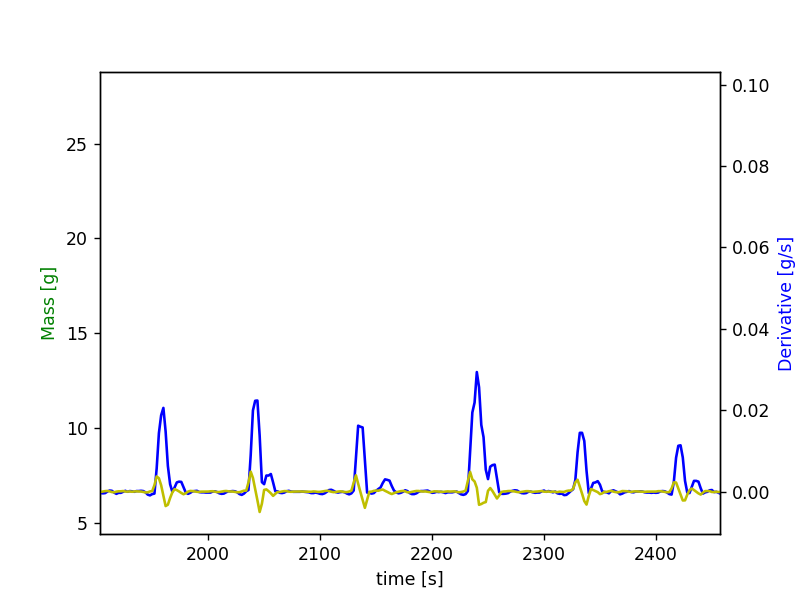

Addition of 0.177g Dehyquart CC7 Benz detected from 1950s to 1982s - expected volume = 0.173mL and actual volume = 0.174mL (resulting error is 1.071%)
Addition of 0.212g Dehyquart CC7 Benz detected from 2034s to 2062s - expected volume = 0.191mL and actual volume = 0.211mL (resulting error is 10.352%)
Addition of 0.151g Dehyquart CC7 Benz detected from 2128s to 2168s - expected volume = 0.136mL and actual volume = 0.149mL (resulting error is 9.783%)
Addition of 0.329g Dehyquart CC7 Benz detected from 2230s to 2264s - expected volume = 0.287mL and actual volume = 0.322mL (resulting error is 12.5%)
Addition of 0.136g Dehyquart CC7 Benz detected from 2324s to 2354s - expected volume = 0.127mL and actual volume = 0.135mL (resulting error is 6.445%)
Addition of 0.102g Dehyquart CC7 Benz detected from 2412s to 2444s - expected volume = 0.1mL and actual volume = 0.1mL (resulting error is 0.0%)


In [14]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=2.5, mergeSens=8, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.01 g/s and for 2nd derivative = 0.003125 g/s^2


<IPython.core.display.Javascript object>


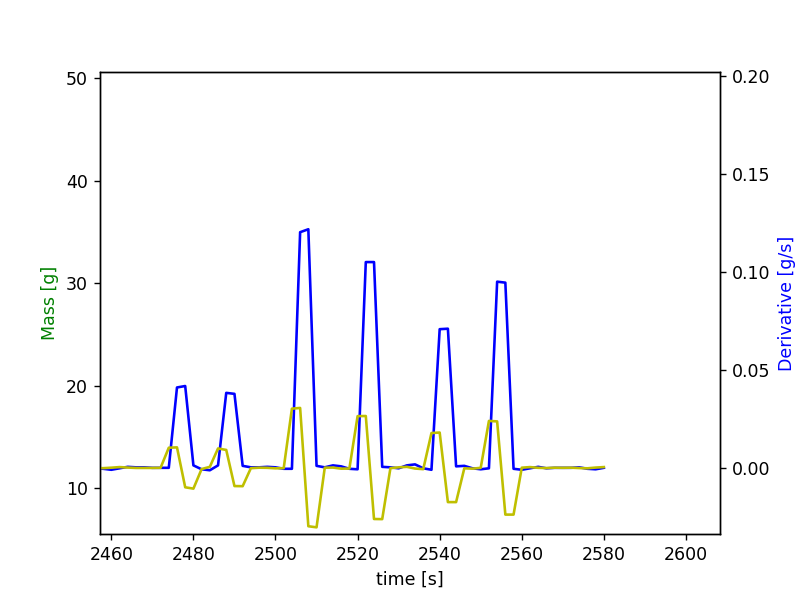

Addition of 0.164g Arlypon F detected from 2472s to 2484s - expected volume = 0.186mL and actual volume = 0.187mL (resulting error is 0.613%)
Addition of 0.153g Arlypon F detected from 2484s to 2496s - expected volume = 0.164mL and actual volume = 0.176mL (resulting error is 7.343%)
Addition of 0.487g Arlypon F detected from 2502s to 2514s - expected volume = 0.543mL and actual volume = 0.554mL (resulting error is 2.201%)
Addition of 0.42g Arlypon F detected from 2518s to 2530s - expected volume = 0.45mL and actual volume = 0.476mL (resulting error is 5.793%)
Addition of 0.288g Arlypon F detected from 2536s to 2548s - expected volume = 0.302mL and actual volume = 0.33mL (resulting error is 9.316%)
Addition of 0.373g Arlypon F detected from 2550s to 2562s - expected volume = 0.412mL and actual volume = 0.424mL (resulting error is 2.755%)


In [15]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [16]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_210423_S331-S336.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_20240\2181709001.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
330,331.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,11.322698,0.0,0.0,12.154214,0.00000,0.000000,0.0,0.0,1.755063,0.0,1.627309,0.0
331,332.0,0.000000,12.097613,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,9.180382,0.00000,0.000000,0.0,0.0,2.083210,0.0,1.509252,0.0
332,333.0,0.000000,0.000000,0.0,0.0,11.648690,0.0,0.000000,0.0,0.0,8.929271,0.00000,0.000000,0.0,0.0,1.505268,0.0,4.843685,0.0
333,334.0,0.000000,11.977111,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,9.541239,0.0,0.0,3.256751,0.0,4.163883,0.0
334,335.0,4.682399,0.000000,0.0,0.0,13.213303,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,1.383898,0.0,2.920151,0.0
335,336.0,6.980633,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,9.63242,0.000000,0.0,0.0,1.036728,0.0,3.791171,0.0
